# This notebook

This notebook contains first bits and pieces of the yet to be developed model correlating climate/environmental factors with conflict occurrence.

## Import libraries and file with settings

In [1]:
import conflict_model

import pandas as pd
import geopandas as gpd
from configparser import RawConfigParser
import matplotlib.pyplot as plt
import numpy as np
import datetime
import rasterstats as rstats
import xarray as xr
import rasterio as rio
import seaborn as sbs
from sklearn import svm
import os, sys

In [2]:
conflict_model.utils.show_versions()

Python version: 3.7.7 (default, Apr 15 2020, 05:09:04) [MSC v.1916 64 bit (AMD64)]
conflict_model version: 0.0.1-beta
geopandas version: 0.7.0
xarray version: 0.15.1
rasterio version: 1.1.0
pandas version: 1.0.3
numpy version: 1.18.1
scikit-learn version: 0.22.1
matplotlib version: 3.2.1
seaborn version: 0.10.1
rasterstats version: 0.14.0


Geopandas versions lower than 0.7.0 do not yet have the clip function. The notebook will thus not work with these versions.

In [3]:
if gpd.__version__ < '0.7.0':
    sys.exit('please upgrade geopandas to version 0.7.0, your current version is {}'.format(gpd.__version__))

In this file all the settings for the analysis are defined. By 'parsing' it, all values are read for different sections. This is a simple way to make the code independent of the input data and settings.

In [4]:
settings_file = r'../data/run_setting.cfg'

In [5]:
config = RawConfigParser(allow_no_value=True)
config.read(settings_file)

['../data/run_setting.cfg']

In [6]:
#out_dir
out_dir = config.get('general','output_dir')
if not os.path.isdir(out_dir):
        os.makedirs(out_dir)
print('for the record, saving output to folder {}'.format(out_dir) + os.linesep)

for the record, saving output to folder C:\Users\hoch0001\Documents\_code\conflict_model\data\OUT



# Applying functions

In [7]:
gdf = conflict_model.utils.get_geodataframe(config)

reading csv file to dataframe C:\Users\hoch0001\Documents\_code\conflict_model\data\UCDP/ged191.csv
...DONE

translating to geopandas dataframe
...DONE



In [8]:
conflict_gdf, extent_gdf = conflict_model.selection.select(gdf, config)

filtering on conflict properties...
...filtering key best with lower value 5
...filtering key type_of_violence with value 1
...passing key country as it is empty
focussing on period between 2000 and 2011

reading extent and spatial aggregation level from file C:\Users\hoch0001\Documents\_code\conflict_model\data\waterProvinces/waterProvinces_Africa.shp
...DONE

clipping datasets to extent
...DONE

clipping to climate zones['BWh', 'BSh']
...DONE



# Functions

# Analysis per year

In a first step, we want to know in which countries there was conflict or not. To that end, we first accumulate the number of fatalities per country and use this as proxy whether there was a conlfict or not (guess there is a rather strong like...).

In [59]:
print('simulation period from', str(config.getint('settings', 'y_start')), 'to', str(config.getint('settings', 'y_end')))
print('')

X1 = []
X2 = []
Y  = []

# go through all simulation years as specified in config-file
for sim_year in np.arange(config.getint('settings', 'y_start'), config.getint('settings', 'y_end'), 1):
    
    print('entering year {}'.format(sim_year) + os.linesep)
    
    # add column whether there was conflict/non-conflict in one year in one region
    out_df = conflict_model.analysis.conflict_in_year_bool(conflict_gdf, extent_gdf, config, sim_year, out_dir, saving_plots=True)
    
    # add column with zonal statistics of GDP per year per region
    out_df = conflict_model.env_vars_nc.rasterstats_GDP_PPP(out_df, config, sim_year, out_dir, saving_plots=True)
    
    # drop all rows with at least one MVs since sklearn does not like NaNs
    out_df = out_df.dropna()
    
    # create arrays with input variables X and target variable Y
    X1 = np.append(X1, out_df['zonal_stats_min_' + str(sim_year)].values)
    X2 = np.append(X2, out_df['zonal_stats_max_' + str(sim_year)].values)
    Y  = np.append(Y, out_df['boolean_conflict_' + str(sim_year)].values)
        
    extent_gdf = out_df.copy()   

print('...simulation DONE')

simulation period from 2000 to 2011

entering year 2000

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2001

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2002

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2003

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2004

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2005

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2006

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2007

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2008

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2009

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

entering year 2010

determining whether a conflict took place or not...
...DONE

calculating zonal statistics per aggregation unit


C:\Users\hoch0001\AppData\Local\Continuum\anaconda3\envs\conflict_model\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


...DONE

...simulation DONE


# Machine Learning

In [72]:
from sklearn import preprocessing

First, we divide the data in a trainings and prediction dataset. We here simply use the first half for training, the other half for prediction.

Also, we scale the trainingsdate to have a mean of (around) 0 and a standard deviation of 1.

In [97]:
X1_train = X1[:int(len(X1)/2)] 
X1_tscaled = preprocessing.scale(X1_train)

X2_train = X2[:int(len(X2)/2)] 
X2_tscaled = preprocessing.scale(X2_train)

Y_train = Y[:int(len(Y)/2)] 

In [99]:
print(X1_tscaled.mean(axis=0))
print(X1_tscaled.std(axis=0))

6.422777828409996e-17
1.0


In [ ]:
X1_predict = X1[int(len(X1)/2):] 
X1_pscaled = preprocessing.scale(X1_predict)

X2_predict = X2[int(len(X2)/2):] 
X2_pscaled = preprocessing.scale(X2_predict)

Y_predict = Y[int(len(Y)/2):] 

Have a glance at the trainings data and how the spread for conflict/non-conflict entries.

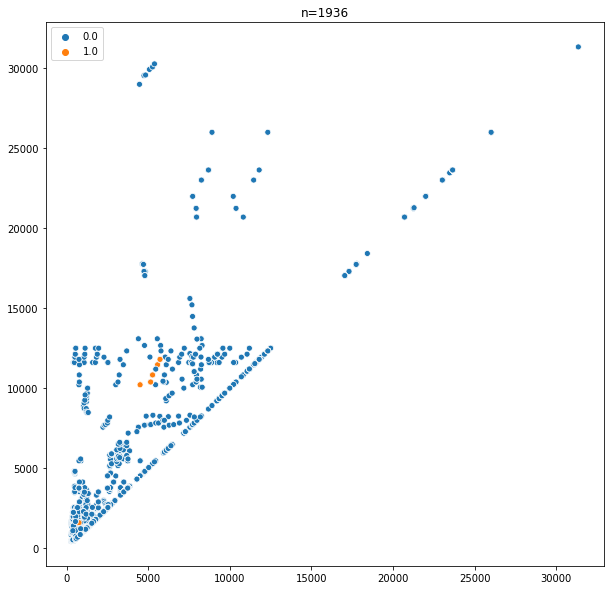

In [102]:
plt.figure(figsize=(10,10))
sbs.scatterplot(x=X1_train,
                y=X2_train,  
                hue=Y_train)

plt.title('n=' + str(len(X1_train)))
plt.savefig(os.path.join(out_dir, 'scatter_plot.png'), dpi=300)
plt.show()

Create Support Vector Classification (SVC) model with balanced weight since data is unbalanced (e.g. many positive and few negative)

In [111]:
clf = svm.SVC(C=0.5, class_weight='balanced', kernel='linear')

Fit the model with the scaled training data and the boolean conflict data

In [112]:
clf.fit(np.transpose([X1_tscaled, X2_tscaled]), Y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predict something with the scaled predition data

In [113]:
iets = clf.predict(np.transpose([X1_pscaled, X2_pscaled]))

Compare the prediction with the prediction data

In [114]:
iets

array([0., 1., 1., ..., 1., 1., 1.])

In [115]:
Y_predict

array([0., 0., 0., ..., 1., 0., 0.])

Values seem to differ, but at least the lenghts are identical!

In [116]:
len(iets), len(Y_predict)

(1936, 1936)

Let's have a scatter plot, but does actually make only little sense if only 0 and 1 are the values

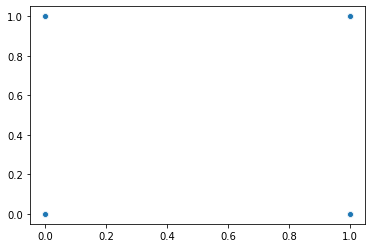

In [117]:
sbs.scatterplot(x=iets,y=Y_predict)

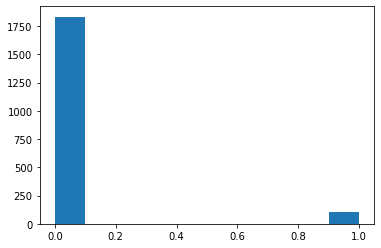

In [120]:
plt.hist(Y_predict);

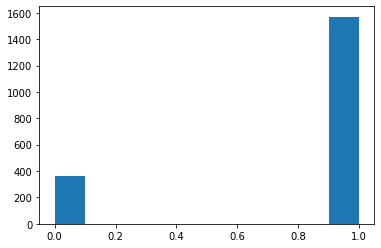

In [121]:
plt.hist(iets);